In [3]:
import warnings
warnings.filterwarnings(action='ignore')

In [4]:
import numpy as np

# 초기 데이터: 각 원소가 샘플입니다.(이 예에서 하나의 샘플이 하나의 문장입니다. 하지만 문서 전체가 될 수도 있습니다.)
samples = ['The cat set on the mat.', 'The dog ate my homework.']

# 데이터에 있는 모든 토큰의 인덱스를 구축합니다.
token_index = {}
for sample in samples:
    # split()메서드를 사용하여 샘플을 토큰으로 나눕니다. 실전에서는 구두점과 특수 문자도 사용합니다.
    for word in sample.split():
        if word not in token_index:
            # 단어마다 고유한 인덱스를 할당합니다. 인덱스 0은 사용하지 않습니다
            token_index[word] = len(token_index) + 1
            
# 샘플을 벡터로 변환합니다. 각 샘플에서 max_length까지 단어만 사용합니다.
max_length = 10

# 결과를 저장할 배열입니다.
results = np.zeros(shape=(len(samples), max_length, max(token_index.values()) + 1))
for i, word in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        index = token_index.get(word)
        results[i, j, index] = 1.

In [5]:
import string

samples = ['The cat set on the mat.', 'The dog ate my homework.']
# 출력 가능한 모든 아스키(ASCII)문자
characters = string.printable
token_index = dict(zip(characters, range(1, len(characters) + 1)))

max_length = 50
results = np.zeros((len(samples), max_length, max(token_index.values()) + 1))
for i, sample in enumerate(samples):
    for j, character in enumerate(sample):
        index = token_index.get(character)
        results[i, j, index] = 1.

In [6]:
from keras.preprocessing.text import Tokenizer

samples = ['The cat set on the mat.', 'The dog ate my homework.']

# 가장 빈도가 높은 1,000개의 단어만 선택하도록 Tokenizer 객체를 만듭니다.
tokenizer = Tokenizer(num_words=1000)
# 단어에 인덱스를 구축합니다.
tokenizer.fit_on_texts(samples)

# 문자열을 정수 인덱스의 리스트로 변환합니다.
sequences = tokenizer.texts_to_sequences(samples)
# 직접 원-핫 이진 벡터 표현을 얻을 수 있습니다. 원-핫 인코딩 외에 다른 벡터화 방법들도 제공합니다.
one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary')
# 계산된 단어 인덱스를 구합니다.
word_index = tokenizer.word_index
print('%s개의 고유한 토큰을 찾았습니다.' % len(word_index))

9개의 고유한 토큰을 찾았습니다.


In [7]:
samples = ['The cat set on the mat.', 'The dog ate my homework.']

# 단어를 크기가 1,000인 벡터로 저장합니다. 1,000개(또는 그 이상)의 단어가 있다면 
# 해싱 충돌이 늘어나고 인코딩의 정확도가 감소될 것입니다.
dimensionality = 1000
max_length = 10

results = np.zeros((len(samples), max_length, dimensionality))
for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        # 단어를 해싱하여 0과 1,000 사이의 랜덤한 정수 인덱스로 변환합니다.
        index = abs(hash(word)) % dimensionality
        results[i, j, index] = 1.

In [8]:
from keras.layers import Embedding

# Embedding 층은 적어도 2개의 매개변수를 받습니다.
# 가능한 토큰의 개수(여기서는 1,000으로 단어 인덱스 최댓값 + 1입니다)와 임베딩 차원(여기서는 64)입니다
embedding_layer = Embedding(1000, 64)

In [9]:
from keras.datasets import imdb
from keras import preprocessing

# 특성으로 사용할 단어의 수
max_features = 10000
# 사용할 텍스트의 길이(가장 빈번한 max_features개의 단어만 사용합니다.)
maxlen = 20 

# 정수 리스트로 데이터를 로드합니다.
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# 리스트를(samples, maxlen)크기의 2D 정수 텐서로 변환합니다.
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

In [10]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding

model = Sequential()
# 나중에 임베딩된 입력을 Flatten 층에서 펼치기 위해 Embedding 층에 input_length를 지정합니다.
# Embedding 층의 출력 크기는 (samples, maxlen, 8)이 됩니다.
model.add(Embedding(10000, 8, input_length=maxlen))

# 3D 임베딩 텐서클(smaples, maxlen * 8)크기의 2D 텐서로 펼칩니다.
model.add(Flatten())

model.add(Dense(1, activation='sigmoid')) # 분류기를 추가합니다.
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten (Flatten)            (None, 160)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
625/625 [==============================] - 1s 2ms/step - loss: 0.6747 - accuracy: 0.6088 - val_loss: 0.6293 - val_accuracy: 0.6948
Epoch 2/10
625/625 [==============================] - 1s 1ms/step - loss: 0.5515 - accuracy: 0.7502 - val_loss: 0.5301 - val_accuracy: 0.7268
Epoch 3/10
625/625 [==============================] - 1s 1ms/step - loss: 0.4643 - accuracy: 0.7

In [11]:
import os

imdb_dir = 'C:/Users/iws1/Downloads/deep-learning-with-python-notebooks-master/datasets/aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding="utf8")
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

In [12]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

# 100개 단어 이후는 버립니다.
maxlen = 100
training_samples = 200 # 훈련 샘플은 200개 입니다.
validation_samples = 10000 # 검증 샘플은 10000개 입니다.
max_words = 10000  # 데이터셋에서 가장 빈도 높은 1만 개의 단어만 사용합니다.

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('%s 개의 고유한 토큰을 찾았습니다.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)
labels = np.asarray(labels)
print('데이터 텐서의 크기:', data.shape)
print('레이블 텐서의 크기:', labels.shape)

# 데이터를 훈련 세트와 검증 세트로 분할합니다.
# 샘플이 순서대로 있기 때문에 (부정 샘플이 모두 나온 후 긍정 샘플이 나옵니다) 먼저 데이터를 섞습니다.
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

88582 개의 고유한 토큰을 찾았습니다.
데이터 텐서의 크기: (25000, 100)
레이블 텐서의 크기: (25000,)


In [13]:
glove_dir = 'C:/Users/iws1/Downloads/deep-learning-with-python-notebooks-master/datasets/'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'), encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('%s개의 단어 벡터를 찾았습니다.' % len(embeddings_index))

400000개의 단어 벡터를 찾았습니다.


In [14]:
embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            # 임베딩 인덱스에 없는 단어는 모두 0이 됩니다.
            embedding_matrix[i] = embedding_vector

In [15]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_1 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [17]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))

model.save_weights('pre_trained_glove_model.h5')

Epoch 1/10
7/7 [==============================] - 1s 93ms/step - loss: 1.6413 - accuracy: 0.4850 - val_loss: 0.7070 - val_accuracy: 0.5032
Epoch 2/10
7/7 [==============================] - 0s 69ms/step - loss: 0.5415 - accuracy: 0.7150 - val_loss: 0.6904 - val_accuracy: 0.5345
Epoch 3/10
7/7 [==============================] - 0s 65ms/step - loss: 0.4227 - accuracy: 0.8200 - val_loss: 0.7690 - val_accuracy: 0.4988
Epoch 4/10
7/7 [==============================] - 0s 67ms/step - loss: 0.5876 - accuracy: 0.6750 - val_loss: 0.7025 - val_accuracy: 0.5438
Epoch 5/10
7/7 [==============================] - 0s 66ms/step - loss: 0.2991 - accuracy: 0.9150 - val_loss: 0.6825 - val_accuracy: 0.5766
Epoch 6/10
7/7 [==============================] - 0s 64ms/step - loss: 0.2018 - accuracy: 0.9750 - val_loss: 0.7105 - val_accuracy: 0.5639
Epoch 7/10
7/7 [==============================] - 0s 63ms/step - loss: 0.3436 - accuracy: 0.8500 - val_loss: 0.6818 - val_accuracy: 0.5817
Epoch 8/10
7/7 [===========

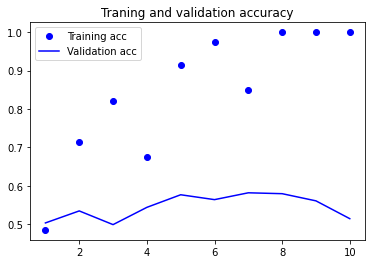

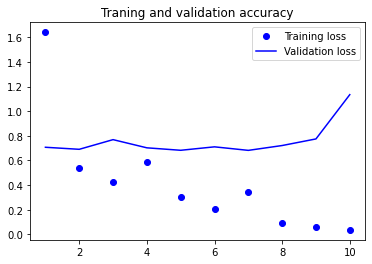

In [18]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Traning and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Traning and validation accuracy')
plt.legend()

plt.show()

In [19]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_2 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
7/7 [==============================] - 1s 99ms/step - loss: 0.6871 - accuracy: 0.6050 - val_loss: 0.6943 - val_accuracy: 0.5023
Epoch 2/10
7/7 [==============================] - 1s 72ms/step - loss: 0.4852 - accuracy: 0.9600 - val_

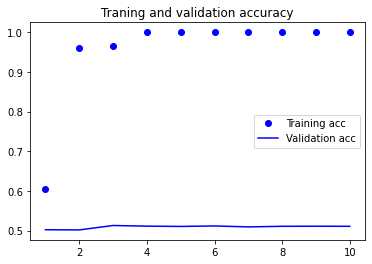

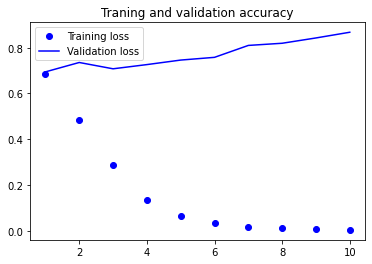

In [20]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Traning and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Traning and validation accuracy')
plt.legend()

plt.show()

In [21]:
training_samples = 2000
x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

In [22]:
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))

Epoch 1/10
63/63 [==============================] - 1s 21ms/step - loss: 0.6361 - accuracy: 0.6040 - val_loss: 0.6502 - val_accuracy: 0.6176
Epoch 2/10
63/63 [==============================] - 1s 20ms/step - loss: 0.1706 - accuracy: 0.9870 - val_loss: 0.6165 - val_accuracy: 0.6710
Epoch 3/10
63/63 [==============================] - 1s 21ms/step - loss: 0.0207 - accuracy: 1.0000 - val_loss: 0.6285 - val_accuracy: 0.6969
Epoch 4/10
63/63 [==============================] - 1s 21ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.6844 - val_accuracy: 0.7078
Epoch 5/10
63/63 [==============================] - 1s 21ms/step - loss: 1.9804e-04 - accuracy: 1.0000 - val_loss: 0.7293 - val_accuracy: 0.7152
Epoch 6/10
63/63 [==============================] - 1s 20ms/step - loss: 1.1337e-05 - accuracy: 1.0000 - val_loss: 0.8014 - val_accuracy: 0.7216
Epoch 7/10
63/63 [==============================] - 1s 21ms/step - loss: 1.0705e-06 - accuracy: 1.0000 - val_loss: 0.8731 - val_accuracy: 0.7239
E

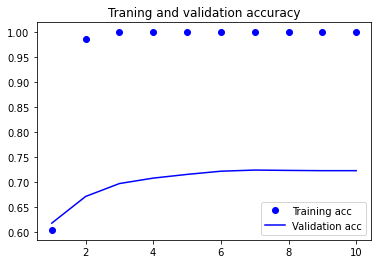

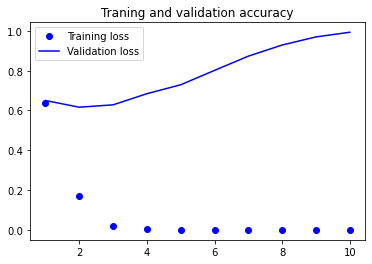

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Traning and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Traning and validation accuracy')
plt.legend()

plt.show()

In [24]:
test_dir = os.path.join(imdb_dir, 'test')

labels = []
texts = []


for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding="utf8")
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)
                
sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)

In [25]:
model.load_weights('pre_trained_glove_model.h5')
model.evaluate(x_test, y_test)

782/782 [==============================] - 1s 2ms/step - loss: 1.1363 - accuracy: 0.5152: 0s - loss: 1.7


[1.1363059282302856, 0.5151600241661072]

# 순환 신경망 이해하기

In [26]:
# 타임스탭 t의 상태입니다.
state_t = 0
# 시퀀스의 원소를 반복합니다.
for input_t in input_sequence:
    output_t = f(input_t, state_t)
    # 출력은 다음 반복을 위한 상태가 됩니다.
    state_t = output_t

NameError: name 'input_sequence' is not defined

In [ ]:
state_t =0
for input_t in input_sequence:
    output_t = activation(dot(W, input_t) + dot(U, state_t) + b)
    state_t = output_t

In [27]:
import numpy as np

# 입력 시퀀스에 있는 타임스탭의 수
timesteps = 100
input_features = 32 # 입력 특성의 차원
output_features = 64 # 출력 특성의 차원

# 입력 데이터: 예제를 위해 생성한 난수
inputs = np.random.random((timesteps, input_features))

# 초기 상태: 모두 0인 벡터
state_t = np.zeros((output_features, ))

# 랜덤한 가중치 행렬을 만듭니다.
W = np.random.random((output_features, input_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features, ))

successive_outputs = []
# input_t는 크기가 (input_features, )인 벡터입니다.
for input_t in inputs:
    # 입력과 현재 상태(이전 출력)를 연결하여 현재 출력을 얻습니다.
    output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)
    # 이 출력을 리스트에 저장합니다.
    successive_outputs.append(output_t)
    # 다음 타임스텝을 위해 네트워크의 상태를 업데이트합니다.
    state_t = output_t
    
# 최종 출력은 크기가 (timesteps, output_features)인 2D 텐서 입니다.
final_output_sequence = np.stack(successive_outputs, axis=0)

In [28]:
import tensorflow as tf
from keras.layers import SimpleRNN

In [29]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [30]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, None, 32)          2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [31]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


In [32]:
from keras.datasets import imdb
from keras.preprocessing import sequence

# 특성으로 사용할 단어의 수
max_features = 10000
# 사용할 텍스트의 길이(가장 빈번한 max_features개의 단어만 사용합니다.)
maxlen = 500
batch_size = 32

print('데이터 로딩...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), '훈련 시퀀스')
print(len(input_test), '테스트 시퀀스')

print('시퀀스 패딩 (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train 크기:', input_train.shape)
print('input_test 크기', input_test.shape)

데이터 로딩...
25000 훈련 시퀀스
25000 테스트 시퀀스
시퀀스 패딩 (samples x time)
input_train 크기: (25000, 500)
input_test 크기 (25000, 500)


In [33]:
from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 17s 109ms/step - loss: 0.6048 - accuracy: 0.6678 - val_loss: 0.4589 - val_accuracy: 0.8062
Epoch 2/10
157/157 [==============================] - 17s 110ms/step - loss: 0.3923 - accuracy: 0.8371 - val_loss: 0.3939 - val_accuracy: 0.8302
Epoch 3/10
157/157 [==============================] - 18s 114ms/step - loss: 0.3084 - accuracy: 0.8752 - val_loss: 0.3422 - val_accuracy: 0.8576
Epoch 4/10
157/157 [==============================] - 17s 109ms/step - loss: 0.2665 - accuracy: 0.8949 - val_loss: 0.3473 - val_accuracy: 0.8556
Epoch 5/10
157/157 [==============================] - 17s 111ms/step - loss: 0.2193 - accuracy: 0.9168 - val_loss: 0.3585 - val_accuracy: 0.8570
Epoch 6/10
157/157 [==============================] - 17s 110ms/step - loss: 0.1836 - accuracy: 0.9327 - val_loss: 0.4109 - val_accuracy: 0.8292
Epoch 7/10
157/157 [==============================] - 17s 111ms/step - loss: 0.1389 - accuracy: 0.9500 - val_loss: 0.5610 - val_ac

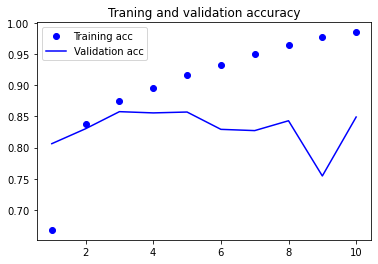

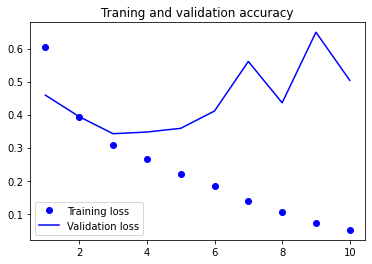

In [34]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Traning and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Traning and validation accuracy')
plt.legend()

plt.show()

In [ ]:
output_t = activation(c_t) * activation((input_t, Wo) +dot(state_t, Uo) + bo)

i_t = activation(dot(state_t, Ui) + dot(input_t, Wi) + bi)
f_t = activation(dot(state_t, Uf) + dot(input_t, Wf) + bf)
k_t = activation(dot(state_t, Uk) + dot(input_t, Wk) + bk)

In [ ]:
c_t + 1 = i_t * k_t + c_t * f_t

In [36]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 41s 261ms/step - loss: 0.4926 - accuracy: 0.7617 - val_loss: 0.3991 - val_accuracy: 0.8340
Epoch 2/10
157/157 [==============================] - 39s 251ms/step - loss: 0.2892 - accuracy: 0.8884 - val_loss: 0.3236 - val_accuracy: 0.8714
Epoch 3/10
157/157 [==============================] - 40s 255ms/step - loss: 0.2358 - accuracy: 0.9120 - val_loss: 0.2804 - val_accuracy: 0.8884
Epoch 4/10
157/157 [==============================] - 41s 259ms/step - loss: 0.2072 - accuracy: 0.9269 - val_loss: 0.2871 - val_accuracy: 0.8780
Epoch 5/10
157/157 [==============================] - 40s 252ms/step - loss: 0.1765 - accuracy: 0.9349 - val_loss: 0.2980 - val_accuracy: 0.8742
Epoch 6/10
157/157 [==============================] - 39s 250ms/step - loss: 0.1557 - accuracy: 0.9461 - val_loss: 0.3285 - val_accuracy: 0.8752
Epoch 7/10
157/157 [==============================] - 40s 255ms/step - loss: 0.1390 - accuracy: 0.9498 - val_loss: 0.3168 - val_ac

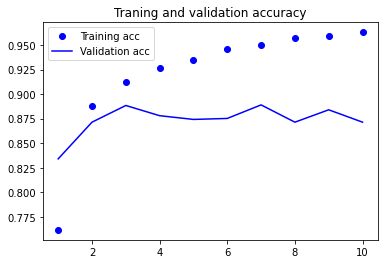

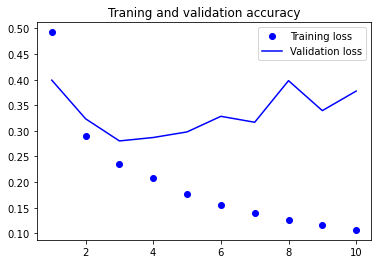

In [37]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Traning and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Traning and validation accuracy')
plt.legend()

plt.show()

# 순환 신경망의 고급 사용법

In [39]:
import os

data_dir = 'C:/Users/iws1/Downloads/deep-learning-with-python-notebooks-master/datasets/jena_climate'
fname = os.path.join(data_dir, 'jena_climate_2009_2016.csv')

f = open(fname)
data = f.read()
f.close()

lines = data.split('\n')
header = lines[0].split(',')
lines = lines[1:]

print(header)
print(len(lines))

['"Date Time"', '"p (mbar)"', '"T (degC)"', '"Tpot (K)"', '"Tdew (degC)"', '"rh (%)"', '"VPmax (mbar)"', '"VPact (mbar)"', '"VPdef (mbar)"', '"sh (g/kg)"', '"H2OC (mmol/mol)"', '"rho (g/m**3)"', '"wv (m/s)"', '"max. wv (m/s)"', '"wd (deg)"']
420551


In [40]:
import numpy as np

float_data = np.zeros((len(lines), len(header) - 1))
for i, line in enumerate(lines):
    values = [float(x) for x in line.split(',')[1:]]
    float_data[i,:] = values

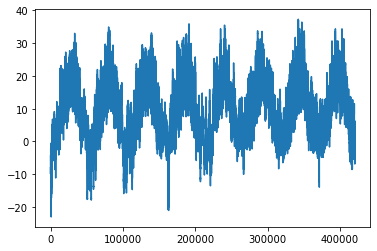

In [42]:
from matplotlib import pyplot as plt

temp = float_data[:, 1] # 온도(섭씨)
plt.plot(range(len(temp)), temp)

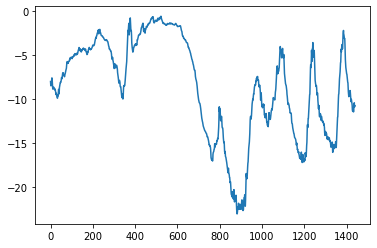

In [43]:
plt.plot(range(1440), temp[:1440])

In [44]:
mean = float_data[:200000].mean(axis=0)
float_data -= mean
std = float_data[:200000].std(axis=0)
float_data /= std

In [59]:
def generator(data, lookback, delay, min_index, max_index, shuffle=False, batch_size=128, step=6):
    if max_index is None:
        max_index = len(data) - delay - 1
    i = min_index + lookback
    while 1:
        if shuffle:
            rows = np.random.randint(min_index + lookback, max_index, size=batch_size)
        else:
            if i + batch_size >= max_index:
                i = min_index + lookback
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows)
            
        samples = np.zeros((len(rows), lookback // step, data.shape[-1]))
        targets = np.zeros((len(rows), ))
        
        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j], step)
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay][1]
        yield samples, targets

In [60]:
lookback = 1440
step = 6
delay = 144
batch_size = 128

train_gen = generator(float_data, lookback=lookback, delay=delay, min_index=0, max_index=200000, shuffle=True,
                     step=step, batch_size=batch_size)
val_gen = generator(float_data, lookback=lookback, delay=delay, min_index=200001, max_index=300000,
                     step=step, batch_size=batch_size)
test_gen = generator(float_data, lookback=lookback, delay=delay, min_index=300001, max_index=None,
                     step=step, batch_size=batch_size)

# 전체 검증 세트를 순회하기 위해 val_gen에서 추출할 횟수
val_steps = (300000 - 200001 - lookback) // batch_size
# 전체 테스트 세트를 순회하기 위해 testgen에서 추출할 횟수
test_steps = (len(float_data)) - lookback

In [61]:
def evaluate_naive_method():
    batch_maes = []
    for step in range(val_steps):
        samples, targets = next(val_gen)
        preds = samples[:, -1, 1]
        mae = np.mean(np.abs(preds - targets))
        batch_maes.append(mae)
    print(np.mean(batch_maes))
    
evaluate_naive_method()

0.2897359729905486


In [62]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Flatten(input_shape=(lookback // step, float_data.shape[-1])))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1))

model.compile(optimizer='rmsprop', loss='mae')

history = model.fit_generator(train_gen, steps_per_epoch=500, epochs=20, validation_data=val_gen,
                             validation_steps=val_steps)

Epoch 1/20
500/500 [==============================] - 13s 25ms/step - loss: 1.2477 - val_loss: 0.6414
Epoch 2/20
500/500 [==============================] - 12s 25ms/step - loss: 0.4235 - val_loss: 0.3266
Epoch 3/20
500/500 [==============================] - 12s 25ms/step - loss: 0.2936 - val_loss: 0.3131
Epoch 4/20
500/500 [==============================] - 13s 26ms/step - loss: 0.2682 - val_loss: 0.3076
Epoch 5/20
500/500 [==============================] - 14s 27ms/step - loss: 0.2552 - val_loss: 0.3397
Epoch 6/20
500/500 [==============================] - 13s 26ms/step - loss: 0.2456 - val_loss: 0.3130
Epoch 7/20
500/500 [==============================] - 13s 25ms/step - loss: 0.2382 - val_loss: 0.3417
Epoch 8/20
500/500 [==============================] - 12s 24ms/step - loss: 0.2339 - val_loss: 0.3179
Epoch 9/20
500/500 [==============================] - 12s 24ms/step - loss: 0.2298 - val_loss: 0.3141
Epoch 10/20
500/500 [==============================] - 12s 24ms/step - loss: 0.223

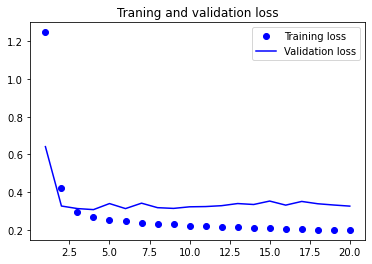

In [64]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Traning and validation loss')
plt.legend()

plt.show()

In [67]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.GRU(32, input_shape=(None, float_data.shape[-1])))
model.add(layers.Dense(1))

model.compile(optimizer='rmsprop', loss='mae')
history = model.fit_generator(train_gen, steps_per_epoch=500, epochs=20, validation_data=val_gen, validation_steps=val_steps)

Epoch 1/20
500/500 [==============================] - 62s 123ms/step - loss: 0.3051 - val_loss: 0.2790
Epoch 2/20
500/500 [==============================] - 65s 131ms/step - loss: 0.2846 - val_loss: 0.2810
Epoch 3/20
500/500 [==============================] - 64s 129ms/step - loss: 0.2794 - val_loss: 0.2625
Epoch 4/20
500/500 [==============================] - 74s 148ms/step - loss: 0.2734 - val_loss: 0.2646
Epoch 5/20
500/500 [==============================] - 71s 142ms/step - loss: 0.2683 - val_loss: 0.2658
Epoch 6/20
500/500 [==============================] - 68s 137ms/step - loss: 0.2638 - val_loss: 0.2694
Epoch 7/20
500/500 [==============================] - 70s 141ms/step - loss: 0.2591 - val_loss: 0.2747
Epoch 8/20
500/500 [==============================] - 68s 135ms/step - loss: 0.2562 - val_loss: 0.2684
Epoch 9/20
500/500 [==============================] - 75s 151ms/step - loss: 0.2511 - val_loss: 0.2798
Epoch 10/20
500/500 [==============================] - 72s 144ms/step - l

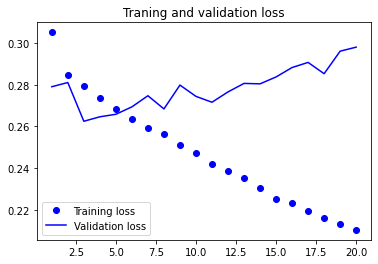

In [68]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Traning and validation loss')
plt.legend()

plt.show()

In [69]:
model = Sequential()
model.add(layers.GRU(32, dropout=0.2, recurrent_dropout=0.2, input_shape=(None, float_data.shape[-1])))
model.add(layers.Dense(1))

model.compile(optimizer='rmsprop', loss='mae')
history = model.fit_generator(train_gen, steps_per_epoch=500, epochs=40, validation_data=val_gen, validation_steps=val_steps)

Epoch 1/40
500/500 [==============================] - 105s 210ms/step - loss: 0.3381 - val_loss: 0.2885
Epoch 2/40
500/500 [==============================] - 103s 206ms/step - loss: 0.3099 - val_loss: 0.2785
Epoch 3/40
500/500 [==============================] - 109s 217ms/step - loss: 0.3015 - val_loss: 0.2770
Epoch 4/40
500/500 [==============================] - 108s 217ms/step - loss: 0.2969 - val_loss: 0.2706
Epoch 5/40
500/500 [==============================] - 106s 213ms/step - loss: 0.2927 - val_loss: 0.2857
Epoch 6/40
500/500 [==============================] - 102s 204ms/step - loss: 0.2885 - val_loss: 0.2758
Epoch 7/40
500/500 [==============================] - 103s 206ms/step - loss: 0.2859 - val_loss: 0.2708
Epoch 8/40
500/500 [==============================] - 108s 216ms/step - loss: 0.2809 - val_loss: 0.2710
Epoch 9/40
500/500 [==============================] - 102s 204ms/step - loss: 0.2772 - val_loss: 0.2751
Epoch 10/40
500/500 [==============================] - 102s 204m

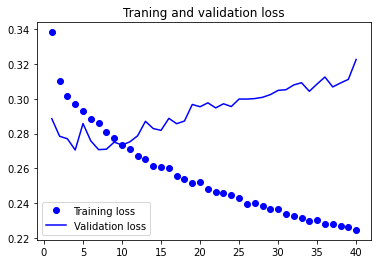

In [70]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Traning and validation loss')
plt.legend()

plt.show()

In [71]:
model = Sequential()
model.add(layers.GRU(32, dropout=0.1, recurrent_dropout=0.5, return_sequences=True, input_shape=(None, float_data.shape[-1])))
model.add(layers.GRU(64, activation='relu', dropout=0.1, recurrent_dropout=0.5))
model.add(layers.Dense(1))

model.compile(optimizer='rmsprop', loss='mae')
history = model.fit_generator(train_gen, steps_per_epoch=500, epochs=40, validation_data=val_gen, validation_steps=val_steps)

Epoch 1/40
500/500 [==============================] - 278s 556ms/step - loss: 0.3229 - val_loss: 0.2778
Epoch 2/40
 28/500 [>.............................] - ETA: 3:45 - loss: 0.3037

KeyboardInterrupt: 

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Traning and validation loss')
plt.legend()

plt.show()

양방향 RNN 사용하기

In [73]:
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras import layers
from keras.models import Sequential

max_features = 10000 # 특성으로 사용할 단어의 수
maxlen = 500  # 사용할 텍스트의 길이(가장 빈번한 max_features개의 단어만 사용합니다.)

# 데이터 로드
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# 시퀀스를 뒤집습니다.
x_train = [x[::-1] for x in x_train]
x_test = [x[::-1] for x in x_test]

# 시퀀스의 패딩을 추가합니다.
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

model = Sequential()
model.add(layers.Embedding(max_features, 128))
model.add(layers.LSTM(32))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 59s 377ms/step - loss: 0.5218 - accuracy: 0.7474 - val_loss: 0.3773 - val_accuracy: 0.8486
Epoch 2/10
157/157 [==============================] - 60s 380ms/step - loss: 0.3268 - accuracy: 0.8728 - val_loss: 0.3496 - val_accuracy: 0.8560
Epoch 3/10
157/157 [==============================] - 61s 387ms/step - loss: 0.2615 - accuracy: 0.9035 - val_loss: 0.3984 - val_accuracy: 0.8220
Epoch 4/10
157/157 [==============================] - 64s 408ms/step - loss: 0.2251 - accuracy: 0.9173 - val_loss: 0.6154 - val_accuracy: 0.8002
Epoch 5/10
157/157 [==============================] - 63s 403ms/step - loss: 0.1926 - accuracy: 0.9327 - val_loss: 0.3600 - val_accuracy: 0.8620
Epoch 6/10
157/157 [==============================] - 63s 403ms/step - loss: 0.1727 - accuracy: 0.9412 - val_loss: 0.3705 - val_accuracy: 0.8824
Epoch 7/10
157/157 [==============================] - 62s 397ms/step - loss: 0.1589 - accuracy: 0.9453 - val_loss: 0.3674 - val_ac

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Traning and validation loss')
plt.legend()

plt.show()

In [ ]:
model = Sequential()
model.add(layers.Embedding(max_features, 32))
model.add(layers.Bidirectional(layers.LSTM(32)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Traning and validation loss')
plt.legend()

plt.show()

In [ ]:
model = Sequential()
model.add(layers.Bidirectional(layers.GRU(32), input_shape=(None, float_data.shape[-1])))
model.add(layers.Dense(1))

model.compile(optimizer='rmsprop', loss='mae')

history = model.fit_generator(train_gen, steps_per_epoch=500, epochs=40, validation_data=val_gen, validation_steps=val_steps)

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Traning and validation loss')
plt.legend()

plt.show()

# 컨브넷을 사용한 시퀀스 처리

In [74]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000
max_len = 500

print('데이터 로드...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), '훈련 시퀀스')
print(len(x_test), '테스트 시퀀스')


# 시퀀스의 패딩을 추가합니다.
print('시퀀스 패딩 (smaples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)
print('x_train 크기:', x_train.shape)
print('x_test 크기:', x_test.shape)

데이터 로드...
25000 훈련 시퀀스
25000 테스트 시퀀스
시퀀스 패딩 (smaples x time)
x_train 크기: (25000, 500)
x_test 크기: (25000, 500)


In [76]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Embedding(max_features, 128, input_length=max_len))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))

model.summary()

model.compile(optimizer=RMSprop(lr=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 500, 128)          1280000   
_________________________________________________________________
conv1d (Conv1D)              (None, 494, 32)           28704     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 98, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 92, 32)            7200      
_________________________________________________________________
global_max_pooling1d (Global (None, 32)                0         
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 33        
Total params: 1,315,937
Trainable params: 1,315,937
Non-trainable params: 0
___________________________________________

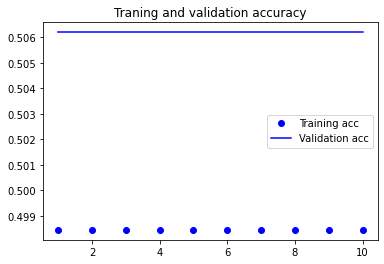

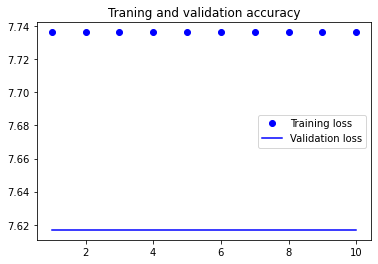

In [77]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Traning and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Traning and validation accuracy')
plt.legend()

plt.show()

In [78]:
model = Sequential()
model.add(layers.Conv1D(32, 5, activation='relu', input_shape=(None, float_data.shape[-1])))
model.add(layers.MaxPooling1D(3))
model.add(layers.Conv1D(32, 5, activation='relu'))
model.add(layers.MaxPooling1D(3))
model.add(layers.Conv1D(32, 5, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))

model.summary()

model.compile(optimizer=RMSprop(), loss='mae')

history = model.fit_generator(train_gen, steps_per_epoch=500, epochs=20, validation_data=val_gen, validation_steps=val_steps)

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, None, 32)          2272      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, None, 32)          0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, None, 32)          5152      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, None, 32)          0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, None, 32)          5152      
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 32)                0         
_________________________________________________________________
dense_21 (Dense)             (None, 1)               

In [79]:
step = 3
lookback = 1440
delay = 144


train_gen = generator(float_data, lookback=lookback, delay=delay, min_index=0, max_index=200000, shuffle=True,
                     step=step)
val_gen = generator(float_data, lookback=lookback, delay=delay, min_index=200001, max_index=300000,
                     step=step)
test_gen = generator(float_data, lookback=lookback, delay=delay, min_index=300001, max_index=None,
                     step=step)

val_steps = (300000 - 200001 - lookback) // 128
test_steps = (len(float_data) - 300001 - lookback) // 128

In [80]:
model = Sequential()
model.add(layers.Conv1D(32, 5, activation='relu', input_shape=(None, float_data.shape[-1])))
model.add(layers.MaxPooling1D(3))
model.add(layers.Conv1D(32, 5, activation='relu'))
model.add(layers.GRU(32, dropout=0.1, recurrent_dropout=0.5))
model.add(layers.Dense(1))

model.summary()

model.compile(optimizer=RMSprop(), loss='mae')

history = model.fit_generator(train_gen, steps_per_epoch=500, epochs=20, validation_data=val_gen, validation_steps=val_steps)

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_5 (Conv1D)            (None, None, 32)          2272      
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, None, 32)          0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, None, 32)          5152      
_________________________________________________________________
gru_6 (GRU)                  (None, 32)                6336      
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 33        
Total params: 13,793
Trainable params: 13,793
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
500/500 [==============================] - 106s 212ms/step - loss: 0.3306 - val_loss: 0.2842
Epoch 2/20
